# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Anish Donepudi
- Andrew Shen
- Ayush More
- Ryan Kane
- Tanveer Mittal

# Group Members IDs

- A15473738
- A15613105
- A15557279
- A13397808
- A15638113

# Research Question

        How well can we model the pricing strategies of airbnb rental listings in San Diego? How accurately can we predict prices for new listings?

## Background and Prior Work

        We, as non-local San Diego residents, have noticed the housing situation and gentrification that exists within the area, contrasting neighborhoods and perspectives from the extravagant mansions Del Mar to compacted housing units of Chula Vista. From personally seeing the strong divide of socio-economic lifestyles, we drew conclusions about the AirBnB price listing, specifically on how the different variables such as the area and types of reviews affect these prices. 
        Airbnb pricing was a question of interest for our group because many of us are renting or looking to rent places in the San Diego area and Airbnb has been a large source of controversy regarding rental property over the past few years, citing, “Short-term rental hosts have long argued they should have the right to use their properties as a way of supplementing their income while residents have complained about the emergence of “mini hotels” disrupting their once quiet neighborhoods.” (3) Airbnb or short term rentals have a large impact on both renters and hosts as they are a shift from the standard long term contracts that many have to sign and often cheaper than hotels. Looking from the perspective of the host, we want to look at how they determine their prices and what factors affect how they charge their rent. By determining a process to generate the most efficient price it makes it easy for hosts to competitively price their rooms while also lowers prices for renters.
        There have been algorithms and programs designed to model and predict the most optimal pricing structures to use however they have a few problems. One such tool created by Dan Hill stated “… the tool still had two weaknesses. The tips it gave were static…” (2) Other models such as BeyondPricing offer professional services such as, “Your listing will be updated daily based on changes in supply and demand in the market, day of week, seasonality, and local events.”(4) but come at a large expense for small term tenants. There are more advanced programs such as an updated tool by Dan Hill which used “... a machine-learning model called a classifier. It uses all of the attributes of a listing and prevailing market demand and then attempts to classify whether it will get booked or not. Our system calculates price tips based on hundreds of attributes… ”(2) The problem with this program is that it used data only accessible by Airbnb themselves and would not be as applicable to rental property outside of Airbnb.


References (include links):
- 1) https://spectrum.ieee.org/computing/software/the-secret-of-airbnbs-pricing-algorithm
- 2) https://www.sandiegouniontribune.com/business/tourism/sd-fi-airbnb-regulations-council-20181022-story.html
- 3) https://beyondpricing.com/

# Hypothesis


       Given the information of an AirBnb listing (i.e location, reviews), the model created will be able to accurately predict the price of these listings as well as future prices within those areas. 
        We believe pricings will be heavily influenced by the area surrounding them, with more expensive listings located near the oceanfront and less expensive listings more inland. The neighborhoods that are closer to the oceanfront like Del Mar are more luxurious and thus expensive compared to areas like Chula Vista.
        Also, we predict that AirBnB listings will be more popular during vacation seasons given the San Diego reputation compared to other seasons such as Winter. As a result, we should expect the prices of the listings to fluctuate in accordance with the influx of tourists.


# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
from datetime import date, datetime, timedelta

In [2]:
listings = pd.read_csv('listings.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
calendar = pd.read_csv('calendar.csv')

# Data Cleaning

### Listings

Listings is going to have all of our data about each AirBnb room

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20191121092222,2019-11-21,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,NaN
1,8488,https://www.airbnb.com/rooms/8488,20191121092222,2019-11-21,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.36
2,29967,https://www.airbnb.com/rooms/29967,20191121092222,2019-11-21,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...","This two bedroom (1 CA king bed, 1 queen bed),...","This 2 bedroom, 2 full bathroom home offers al...",none,NaN,...,f,f,moderate,f,f,5,5,0,0,0.53
3,38245,https://www.airbnb.com/rooms/38245,20191121092222,2019-11-21,Point Loma/Liberty Station-NTC,Stay in a 1928 Spanish Style home. Den is dow...,Please note: 1928 home; remodeled in 2015. Co...,Stay in a 1928 Spanish Style home. Den is dow...,none,"This neighborhood is an expensive, high-end Po...",...,f,f,moderate,t,t,3,0,3,0,1.28
4,39516,https://www.airbnb.com/rooms/39516,20191121092222,2019-11-21,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,3.38


As seen there are over 100 columns. We'll clean Listings to only get the columns informaiton valueable to us.

In [5]:
listings = listings[['id','accommodates','bedrooms','beds', 'zipcode', 'review_scores_rating']]
listings.head()

,id,accommodates,bedrooms,beds,zipcode,review_scores_rating
0,5570,6,2.0,4.0,92109,NaN
1,8488,5,3.0,3.0,92104,97.0
2,29967,8,2.0,3.0,92109,98.0
3,38245,1,1.0,1.0,92106,86.0
4,39516,2,1.0,1.0,92104,98.0


Here is our final dataframe. These columns in listings are already fairly clean. The missings values in review_scores_rating are just taken to mean a room with a review rating of 0.

### Calendar

Calendar is going to contain the price of each listing on each day

In [6]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5570,2019-11-21,f,"$2,050.00","$2,050.00",3,365
1,5570,2019-11-22,f,"$2,050.00","$2,050.00",3,365
2,5570,2019-11-23,f,"$2,050.00","$2,050.00",3,365
3,5570,2019-11-24,f,"$2,050.00","$2,050.00",3,365
4,5570,2019-11-25,f,"$2,050.00","$2,050.00",3,365


Just like listings we will remove all the columns with unnecessary information.

In [8]:
calendar = calendar[['listing_id','date','price']]

This time we'll also drop any rows with missing values.

In [9]:
calendar.dropna()

,listing_id,date,price
0,5570,2019-11-21,"$2,050.00"
1,5570,2019-11-22,"$2,050.00"
2,5570,2019-11-23,"$2,050.00"
3,5570,2019-11-24,"$2,050.00"
4,5570,2019-11-25,"$2,050.00"
...,...,...,...
4954505,39435249,2020-11-15,$135.00
4954506,39435249,2020-11-16,$135.00
4954507,39435249,2020-11-17,$135.00
4954508,39435249,2020-11-18,$135.00


The next step is to clean the date and price columns in calendar. To clean data, we will need to convert all objects in data to datatime objects.

In [10]:
calendar['date'] = pd.to_datetime(calendar['date'])

To clean price, we will first create a fuction dollar_to_number. This will convert a string into an number value. Then we will apply it to the price column.

In [12]:
def dollar_to_number(string):
    string = string.replace('$', '')
    string = string.replace(',', '')
    string = string.replace('.', '')
    number = int(string)/100
    return number

In [13]:
calendar['price'] = calendar['price'].apply(dollar_to_number)

Now here is out final dataframe after it has been cleaned.

In [14]:
calendar.head()

,listing_id,date,price
0,5570,2019-11-21,2050.0
1,5570,2019-11-22,2050.0
2,5570,2019-11-23,2050.0
3,5570,2019-11-24,2050.0
4,5570,2019-11-25,2050.0


# Data Analysis & Results

The first setep twoards analyzing the prices for each room is to be able to seperate out different type of rooms from each other. To do that we have a function, filter_room_details, that will take in specific parameters about each room and only return listings that meet those parameters.

In [16]:
# returns a df with rooms that meet room critera
def filter_room_details(df, num_guests, num_bedrooms, num_beds, area, review):
    
    # get rooms greater than max_num_guests
    df_filtered_room = df[(df['accommodates'] ==  num_guests) 
                        & (df['bedrooms']  >=  num_bedrooms)
                        & (df['beds']  >=  num_beds)
                        & (df['review_scores_rating']  >=  review)]
    
    # if area is given get rooms in area
    if area != 0:
        df_filtered_room = df_filtered_room.loc[df_filtered_room['zipcode']  ==  area]

    
    return df_filtered_room

Here we can test this function by finding all rooms with: 
- capacity for 6 guests
- located in 92109
- a review score greater than 80

In [17]:
num_guests = 6
zipcode = 92109
minimum_review = 80

df_filter_room_details_test = filter_room_details(listings, num_guests, 0, 0, zipcode, minimum_review)
df_filter_room_details_test

,id,accommodates,bedrooms,beds,zipcode,review_scores_rating
10,69385,6,3.0,4.0,92109,97.0
94,395071,6,2.0,5.0,92109,95.0
187,766826,6,3.0,0.0,92109,99.0
194,797668,6,2.0,4.0,92109,96.0
203,821576,6,2.0,2.0,92109,94.0
...,...,...,...,...,...,...
7987,26258281,6,2.0,3.0,92109,95.0
8009,26331580,6,2.0,2.0,92109,87.0
8058,26452943,6,3.0,3.0,92109,100.0
8126,26602212,6,2.0,4.0,92109,92.0


As you can see there are 321 listings on AirBnb that meet those 3 criteria. Because we did not specify the number of bedrooms or beds, you can see some variance in those between each listing.

Now we will take the dataframe created from filter_room_details and the users given time frame inorder to gather the prices for each listing over the time span given.

In [18]:
# returns a df with rooms that meet time critera
def filter_timespan(df_listings, df_calendar, start_date, end_date):
    
    # get a list of days in the timespan
    day_list = []
    day_count = (end_date - start_date).days + 1
    for day in [d for d in (start_date + timedelta(n) for n in range(day_count)) if d <= end_date]:
        day_list.append(day)
    
    # get listing ids from df_listings
    id_list = df_listings['id'].to_list()
    
    #remove ids from df_calendar that are not in id_list
    df_calendar_filtered = df_calendar[df_calendar['listing_id'].isin(id_list)]
    
    #remove dates from df_calendar that are not in day_list
    df_calendar_filtered = df_calendar[df_calendar['date'].isin(day_list)]
    
    # at this point calendar only contains the listings that meet our criteria
    # we can drop the listing_id column
    df_calendar_filtered = df_calendar_filtered.drop('listing_id', axis = 1)
    
    # group items by date and find the average price on that day
    df_calendar_filtered = df_calendar_filtered.groupby(['date']).mean()
    
    #convert and return as series
    series = pd.Series(df_calendar_filtered['price'])
    return series

This will return the average prices on each day for all the listings that met our intital criteria.

To test this function we'll use the filtered data frame from before and specify the time spand to be between the end of December 2019 to the end of December 2020. Its important to note however that our dataset only covers listings and prices between 2019-11-21 and 2020-11-19.

In [25]:
start_date = date(2019, 12, 31)
end_date = date(2020, 12, 31)

df_timeseries_test = filter_timespan(df_filter_room_details_test, calendar, start_date, end_date)
df_timeseries_test

date
2019-12-31    245.079490
2020-01-01    235.330927
2020-01-02    217.580374
2020-01-03    227.317666
2020-01-04    226.509577
                 ...    
2020-11-15    220.735745
2020-11-16    219.767865
2020-11-17    220.604685
2020-11-18    221.224400
2020-11-19    224.404523
Name: price, Length: 325, dtype: float64

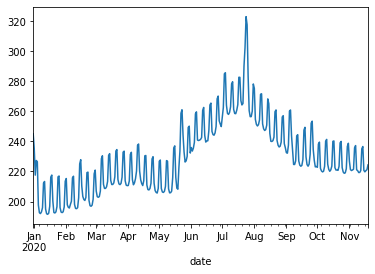

In [26]:
graph = df_timeseries_test.plot.line()
graph

Here is our series when plotted on a line graph

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*